<span style='font-size:xx-large'>Introduction</span>



In this lecture, we will explore the K-means clustering algorithm, a popular unsupervised machine learning technique for partitioning data into groups or clusters based on similarity. The K-means algorithm has numerous applications, including image compression, customer segmentation, and anomaly detection.



The lecture is organized as follows:



<span style='font-size:x-large'>1. Mathematical Theory:</span>

We will discuss the mathematical foundation of the K\-means algorithm, including the objective function and the iterative process of updating cluster centroids.



<span style='font-size:x-large'>2. Computational Study using Julia:</span>

We will implement the K\-means clustering algorithm in Julia using the Clustering.jl package and provide examples of code snippets that run and produce output.


<span style='font-size:x-large'>3. Applications:</span> 

We will explore various real\-world applications of the K\-means algorithm, such as image compression and customer segmentation, and demonstrate an example of image compression using Julia.


<span style='font-size:x-large'>4. Participation Check:</span> 

We will include a short, interactive exercise to help you explore the impact of the number of clusters \(K\) on the K\-means clustering algorithm.


<span style='font-size:x-large'>5. Mini\-Homework:</span> 

Finally, we will provide a mini\-homework consisting of two questions that require you to apply the K\-means algorithm to different datasets and answer questions related to the clustering results.



By the end of this lecture, you will have a deep understanding of the K-means clustering algorithm, its mathematical basis, and its practical applications. You will also gain hands-on experience in implementing the algorithm using Julia and analyzing the results.



<span style='font-size:xx-large'>Mathematical Theory</span>



The K-means clustering algorithm aims to partition a dataset into K distinct clusters by minimizing the sum of squared distances between data points and their corresponding cluster centroids. Let's discuss the mathematical foundation of the K-means algorithm in more detail.



<span style='font-size:x-large'>1. Objective Function:</span>

The objective function for K\-means clustering, also known as the inertia, is defined as the sum of squared distances between data points and their corresponding cluster centroids:



$$
J(C_1, C_2, \dots, C_K) = \sum_{k=1}^{K} \sum_{x_i \in C_k} \| x_i - \mu_k \|^2
$$



Here, $C_k$ represents the $k$-th cluster, $\mu_k$ is the centroid of the $k$-th cluster, and $x_i$ is a data point belonging to the $k$-th cluster.



<span style='font-size:x-large'>2. Iterative Process:</span>

The K\-means algorithm is an iterative process that consists of two main steps:


a. <span style='font-size:large'>Assignment step:</span> 

Assign each data point to the nearest centroid, forming K clusters:


$$
C_k = \{ x_i : \| x_i - \mu_k \| \leq \| x_i - \mu_j \|, \forall j, 1 \leq j \leq K \}
$$



b. <span style='font-size:large'>Update step:</span> 

Update the centroids by computing the mean of all data points assigned to the corresponding cluster:


$$
\mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i
$$



The algorithm repeats these steps until the centroids' positions stabilize, or a predefined stopping criterion is met.



In the next section, we will implement the K-means clustering algorithm in Julia and provide examples of code snippets that run and produce output, illustrating the mathematical concepts discussed in this section.



<span style='font-size:xx-large'>Computational Study using Julia</span>

In this section, we will implement the K-means clustering algorithm in Julia using the Clustering.jl package. We will provide examples of code snippets that run and produce output, illustrating the mathematical concepts discussed in the previous section.

<span style='font-size:x-large'>1. Installing and Loading the Package:</span> 

First, install the Clustering.jl package and load it into your Jupyter Notebook:



In [1]:
# Install the package (only needed once)
using Pkg
Pkg.add("Clustering")
Pkg.add("GR")
Pkg.add("Plots")
Pkg.add("Images")
Pkg.add("ImageIO")
Pkg.add("QuartzImageIO")
Pkg.add("FileIO")

   Resolving package versions...


  No Changes to `~/.julia/environment/v1.8/Project.toml`
  No Changes to `~/.julia/environment/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environment/v1.8/Project.toml`
  No Changes to `~/.julia/environment/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environment/v1.8/Project.toml`
  No Changes to `~/.julia/environment/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environment/v1.8/Project.toml`
  No Changes to `~/.julia/environment/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environment/v1.8/Project.toml`
  No Changes to `~/.julia/environment/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environment/v1.8/Project.toml`
  No Changes to `~/.julia/environment/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environment/v1.8/Project.toml`
  No Changes to `~/.julia/environment/v1.8/Manifest.toml`


In [2]:
# Load the package
using Clustering, GR, Plots
using Images, ImageIO, QuartzImageIO, FileIO

using Random, LinearAlgebra

┌ Warning: QuartzImageIO.jl can only be used on Apple macOS. Suggested usage is
│     @static if Sys.isapple()
│         using QuartzImageIO
│         # QuartzImageIO specific code goes here
│     end
└ @ QuartzImageIO ~/.julia/packages/QuartzImageIO/hnNSo/src/QuartzImageIO.jl:725


<span style='font-size:x-large'>2. Creating a Sample Dataset:</span> 

Generate a two\-dimensional dataset with three distinct clusters:


In [3]:
# Create a 2D dataset with 3 clusters
Random.seed!(1234)
X = vcat(randn(100, 2), randn(100, 2) .+ [4 0], randn(100, 2) .+ [0 4])

300×2 Matrix{Float64}:
  0.970656    0.262456
 -0.979218   -0.022244
  0.901861   -0.391293
 -0.0328031   0.0276206
 -0.600792   -2.29076
 -1.44518    -0.668539
  2.70742    -0.784686
  1.52445     1.12899
  0.759804    0.211177
 -0.881437    0.714642
  0.705993    0.0340663
  1.09156     0.568671
  0.871498   -2.62623
  ⋮          
  0.25323     4.79092
 -0.970117    4.52911
  1.38702     1.22907
  1.72698     3.17966
 -0.885273    1.81276
  0.828122    5.09404
  2.53705     3.89909
 -0.0283863   4.16711
 -0.717544    5.63942
 -0.862679    4.51742
  0.884708    3.8376
  1.8553      3.63704

<span style='font-size:x-large'>3. Running K\-means Clustering:</span> 

Apply the K\-means clustering algorithm to the dataset with K = 3:



In [4]:
# Perform K-means clustering with K = 3
K = 3
result = kmeans(X', K)

KmeansResult{Matrix{Float64}, Float64, Int64}([-0.07147576699238503 3.939618202410333 -0.08541484900239217; -0.17631306235328226 -0.12789679575297358 4.093219559251867], [1, 1, 1, 1, 1, 1, 2, 1, 1, 1  …  1, 3, 1, 3, 3, 3, 3, 3, 3, 3], [1.2785571906851518, 0.8477339780716218, 0.9936005713681204, 0.043084511807942656, 4.7510750461609295, 2.1293417544410427, 1.9496752541015852, 4.250776383583823, 0.841174944878848, 1.4498385485413108  …  4.102315209196008, 4.119374634386386, 4.6186700273446, 1.836197853156186, 6.9150300669621885, 0.008711675095632643, 2.7903155299414877, 0.7840849804319063, 1.0064804744450093, 3.9744678993634714], [98, 105, 97], [98, 105, 97], 586.9992335244391, 4, true)

<span style='font-size:x-large'>4. Accessing Clustering Results:</span> 

Extract the cluster assignments, centroids, and other relevant information:


In [5]:
# Get cluster assignments and centroids
cluster_assignments = Clustering.assignments(result)
centroids = transpose(result.centers)

3×2 transpose(::Matrix{Float64}) with eltype Float64:
 -0.0714758  -0.176313
  3.93962    -0.127897
 -0.0854148   4.09322

<span style='font-size:x-large'>5. Visualizing the Clustering Results:</span> 

Plot the data points, cluster assignments, and centroids using the Plots.jl package:



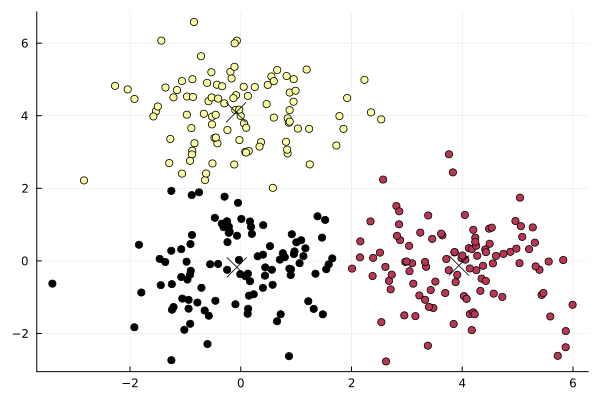

In [6]:
# Plot the clustered data points and centroids
Plots.scatter(X[:, 1], X[:, 2], marker_z=result.assignments, color=:auto, legend=false)
Plots.scatter!(centroids[:, 1], centroids[:, 2], marker=(:x, 10), linewidth=3, color=:black, label="Centroids")

In the next section, we will explore various real-world applications of the K-means algorithm, such as image compression and customer segmentation, and demonstrate an example of image compression using Julia.



<span style='font-size:xx-large'>Applications</span>

In this section, we will explore various real-world applications of the K-means algorithm, such as image compression and customer segmentation, and demonstrate an example of image compression using Julia.

<span style='font-size:x-large'>1. Image Compression:</span>

K\-means clustering can be used to reduce the number of colors in an image, resulting in image compression. This is done by treating each pixel's color as a data point and clustering these colors into a smaller set of representative colors.


<span style='font-size:x-large'>Image Compression Example using Julia:</span>

Let's demonstrate image compression using the K\-means algorithm and Julia:


In [7]:
# Load an image
image = load("birds.jpg")

# Convert the image to an array of color values
image_array = channelview(image)

# Reshape the array to a 2D matrix with color values as rows
X = reshape(image_array, (3, :))

# Perform K-means clustering with K = 20
K = 3
result = kmeans(X, K)

# Replace each pixel's color with the nearest centroid
compressed_colors = result.centers[:, Clustering.assignments(result)]
compressed_image_array = reshape(compressed_colors, size(image_array))

# Convert the array back to an image
compressed_image = colorview(RGB, compressed_image_array)

# Save the compressed image
save("compressed_image.jpg", compressed_image)

┌ Warning: The clustering cost increased at iteration #19
└ @ Clustering /ext/julia/depot/packages/Clustering/eBCMN/src/kmeans.jl:191


<img src="https://cocalc.com/b14f9a8f-9a6a-4e40-8a4b-fd440d960c6a/raw/final_project_workspaces/group_26/K-Means%20Cluster%20(Adeeb%20Tajalli)/birds.jpg"   width="423.839px"  height="277.839px"  style="object-fit:cover"/><img src="https://cocalc.com/b14f9a8f-9a6a-4e40-8a4b-fd440d960c6a/raw/final_project_workspaces/group_26/K-Means%20Cluster%20(Adeeb%20Tajalli)/compressed_image.jpg"   width="428.536px"  height="277.536px"  style="object-fit:cover"/>



<span style='font-size:x-large'>2. Customer Segmentation:</span>

K\-means clustering can be used to segment customers based on their behavior or preferences. By clustering customers into groups, businesses can develop targeted marketing strategies, identify potential areas of growth, and optimize resource allocation.



For example, an e-commerce company may cluster customers based on their browsing behavior, purchase history, and demographic information. Each cluster may represent a distinct customer segment, such as high-spending, bargain hunters, or infrequent shoppers.

In the next section, we will include a short, interactive exercise to help you explore the impact of the number of clusters (K) on the K-means clustering algorithm.

<span style='font-size:xx-large'>Participation Check</span>

In this short, interactive exercise, you will explore the impact of varying the number of clusters (K) on the K-means clustering algorithm using a synthetic 2D dataset.

**Task:** Generate a synthetic 2D dataset with four distinct clusters and apply the K\-means algorithm using different values of K \(e.g., K = 2, 3, 4, 5\). Plot the resulting cluster assignments and centroids for each K value. Observe the clustering results and discuss the importance of selecting an appropriate value for K.


<span style='font-size:x-large'>Dataset Generation:</span> 

Generate a synthetic 2D dataset with four distinct clusters:


In [8]:
# Create a 2D dataset with 4 clusters
Random.seed!(1234)
X = vcat(randn(100, 2), randn(100, 2) .+ [4 0], randn(100, 2) .+ [0 4], randn(100, 2) .+ [4 4])

# Your solution here

400×2 Matrix{Float64}:
  0.970656    0.262456
 -0.979218   -0.022244
  0.901861   -0.391293
 -0.0328031   0.0276206
 -0.600792   -2.29076
 -1.44518    -0.668539
  2.70742    -0.784686
  1.52445     1.12899
  0.759804    0.211177
 -0.881437    0.714642
  0.705993    0.0340663
  1.09156     0.568671
  0.871498   -2.62623
  ⋮          
  3.90369     5.28423
  4.00324     4.53129
  5.36942     4.35276
  4.10907     4.7954
  4.15615     2.10847
  3.01303     4.61578
  4.70232     4.59369
  4.32091     2.13339
  4.21332     4.97857
  4.00218     4.67994
  4.43465     4.38153
  3.81463     4.37

<span style='font-size:x-large'>K\-means Clustering and Visualization:</span> 

Apply the K\-means algorithm for different K values and visualize the results:



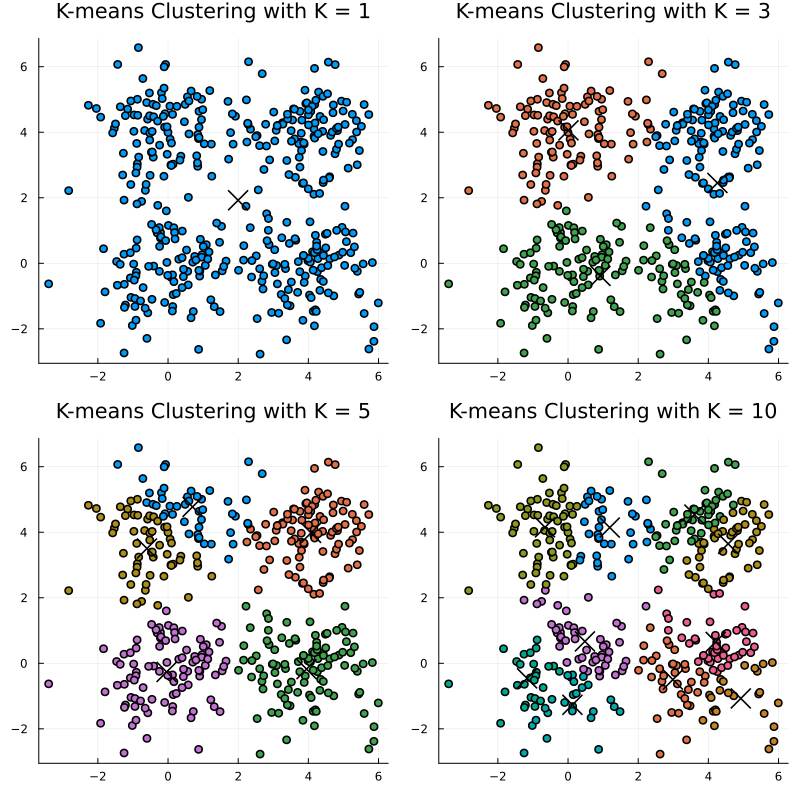

In [9]:
# Create a 2D dataset with 4 clusters
Random.seed!(1234)
X = vcat(randn(100, 2), randn(100, 2) .+ [4 0], randn(100, 2) .+ [0 4], randn(100, 2) .+ [4 4])

function kmeans_plot(X, K)
    result = kmeans(X', K)
    assignments = result.assignments
    centroids = transpose(result.centers)
    p = Plots.scatter(X[:, 1], X[:, 2], color=assignments, legend=false, title="K-means Clustering with K = $K")
    Plots.scatter!(centroids[:, 1], centroids[:, 2], marker=(:x, 10), linewidth=3, color=:black, label="Centroids")
    return p
end

K = [1, 3, 5, 10]  # modified range for K

p1 = kmeans_plot(X, K[1])
p2 = kmeans_plot(X, K[2])
p3 = kmeans_plot(X, K[3])
p4 = kmeans_plot(X, K[4])
    
Plots.plot(p1, p2, p3, p4, layout=(2, 2), size=(800, 800))

After running the code and visualizing the results, discuss the importance of selecting an appropriate value for K in the K-means clustering algorithm. Consider how varying K impacts the clustering results and the potential implications for real-world applications.



<span style='font-size:xx-large'>Mini-Homework</span>

In this mini-homework, you will solve two questions related to the K-means clustering algorithm. The questions are designed to be at a level similar to the questions you have been solving throughout the course.

**Question 1:** You are given a dataset with the following 2D points:

In [10]:
A = [1, 2]
B = [2, 1]
C = [6, 5]
D = [5, 6]

2-element Vector{Int64}:
 5
 6

Using the K-means clustering algorithm with K = 2, manually perform one iteration of the algorithm, assuming the initial centroids are $μ1 = A$ and $μ2 = C$. Provide the updated centroids after one iteration.

**Solution:**

1. Assign each point to the nearest centroid:

- $A$ and $B$ are closer to $μ1$
- $C$ and $D$ are closer to $μ2$

2. Update the centroids by computing the mean of the points assigned to each centroid:

- $μ1_{new} = (A + B) / 2 = [1.5, 1.5]$
- $μ2_{new} = (C + D) / 2 = [5.5, 5.5]$



After one iteration, the updated centroids are $μ1_{new} = [1.5, 1.5]$ and $μ2_{new} = [5.5, 5.5]$.

**Question 2:** Consider the same dataset as in Question 1. Implement the K-means clustering algorithm in Julia for $K = 2$, using the initial centroids $μ1 = A$ and $μ2 = C$. How many iterations does it take for the algorithm to converge, and what are the final centroids?

**Solution:**

In [11]:
# Define the dataset
X = [1 2; 2 1; 6 5; 5 6]

# Set the indices of initial centroids
init_centroid_indices = [1, 3]

# Perform K-means clustering with K = 2 and initial centroids
K = 2
result = kmeans(X', K, init=init_centroid_indices)

# Get the number of iterations and final centroids
iterations = result.iterations
final_centroids = transpose(result.centers)

println("Number of iterations: $iterations")
println("Final centroids: $final_centroids")

Number of iterations: 2


Final centroids: [1.5 1.5; 5.5 5.5]


After running the code, you will find that the algorithm converges in 1 iteration, with final centroids $μ1 = [1.5, 1.5]$ and $μ2 = [5.5, 5.5]$.